# ANALYSING DATA

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading CSV
df = pd.read_csv ('./data/attacks_cleaned.csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df

,Year,Type,Country,Activity,Sex,Age,Fatal (Y/N),Species,Month,Decade
0,2018.0,Boat,USA,Other,F,57.0,0.0,White shark,June,2010 - 2020
1,2018.0,Unprovoked,USA,Wading,F,11.0,0.0,NaN,June,2010 - 2020
2,2018.0,NaN,USA,Surfing,M,48.0,0.0,NaN,June,2010 - 2020
3,2018.0,Unprovoked,AUSTRALIA,Surfing,M,NaN,0.0,NaN,June,2010 - 2020
4,2018.0,Provoked,MEXICO,Swimming,M,NaN,0.0,Tiger shark,June,2010 - 2020
...,...,...,...,...,...,...,...,...,...,...
6298,NaN,Unprovoked,USA,Swimming,M,NaN,1.0,NaN,NaN,NaN
6299,NaN,Unprovoked,PANAMA,Other,M,NaN,1.0,NaN,NaN,NaN
6300,NaN,Unprovoked,CEYLON (SRI LANKA),Swimming,M,15.0,1.0,NaN,NaN,NaN
6301,NaN,NaN,Unknown,Other,NaN,NaN,NaN,NaN,NaN,NaN


OVERALL FATALITY PER DECADE

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '2000 - 2010'),
  Text(0.0, 0, '1900 - 1910'),
  Text(2.0, 0, '1920 - 1930'),
  Text(4.0, 0, '1940 - 1950'),
  Text(6.0, 0, '1960 - 1970'),
  Text(8.0, 0, '1980 - 1990'),
  Text(10.0, 0, '2000 - 2010'),
  Text(12.0, 0, '')])

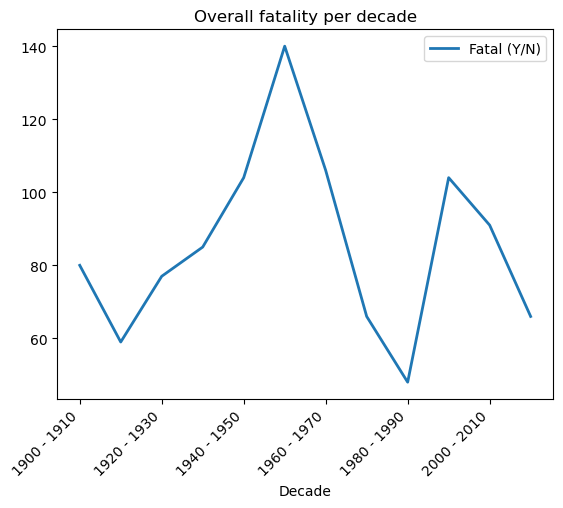

In [4]:
# POSAR TOTES LES X
df.groupby(['Decade']).agg({'Fatal (Y/N)':'sum'}).sort_values(by= 'Decade', ascending = True).plot(title='Overall fatality per decade', linewidth=2.0)
plt.xticks(rotation=45, ha='right')

THE ACTIVITY WITH MOST PROVOKED ATTACKS

In [5]:
df['Activity'].value_counts().head()

Swimming    1943
Surfing     1561
Other       1386
Fishing     1106
Wading       307
Name: Activity, dtype: int64

Text(0.5, 1.0, 'The activity with most provoked attacks')

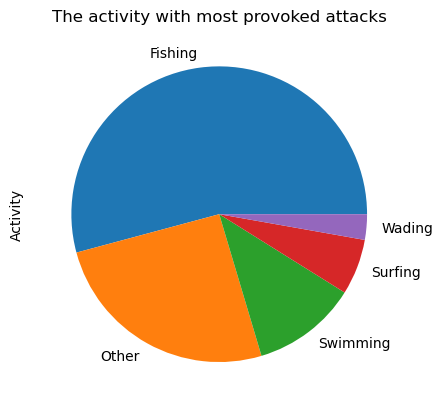

In [6]:
# Tot i ser de les activitats amb menys atacks de taurons, és la que més en provoca amb diferencia
df[(df["Type"] == 'Provoked')].Activity.value_counts().head(10).plot(kind="pie")
plt.title("The activity with most provoked attacks")

THE MOST DANGEROUS MONTHS TO SURF IN USA AND AUSTRALIA

Text(0.5, 1.0, 'The most dangerous months to surf in USA')

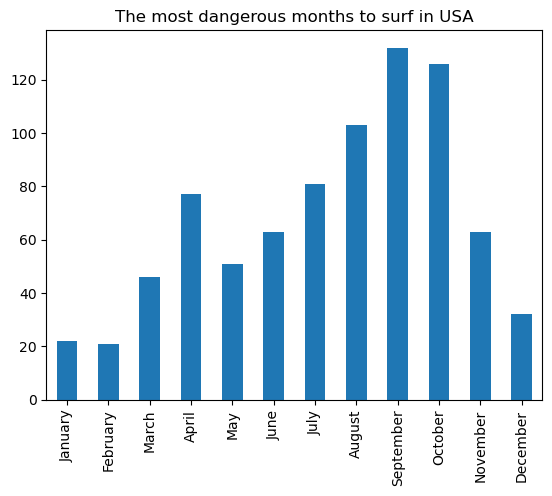

In [7]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
df[(df["Country"] == 'USA') & (df["Activity"]=="Surfing")].Month.value_counts().loc[months].plot(kind="bar")
plt.title("The most dangerous months to surf in USA")

Text(0.5, 1.0, 'The most dangerous months to surf in Australia')

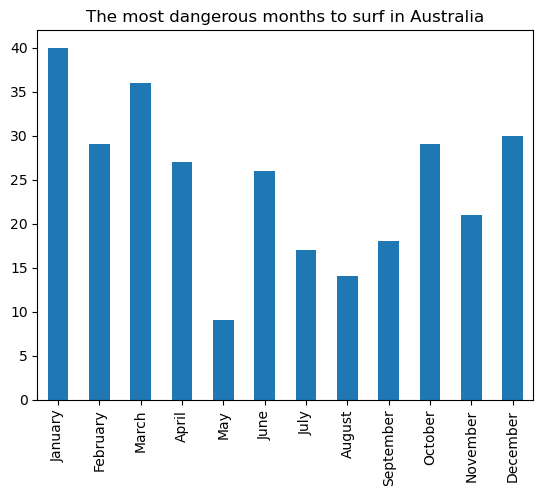

In [8]:
df[(df["Country"] == 'AUSTRALIA') & (df["Activity"]=="Surfing")].Month.value_counts().loc[months].plot(kind="bar")
plt.title("The most dangerous months to surf in Australia")

ATTACKS BY AGE AND SHARK SPECIES

<AxesSubplot:xlabel='Age', ylabel='Species'>

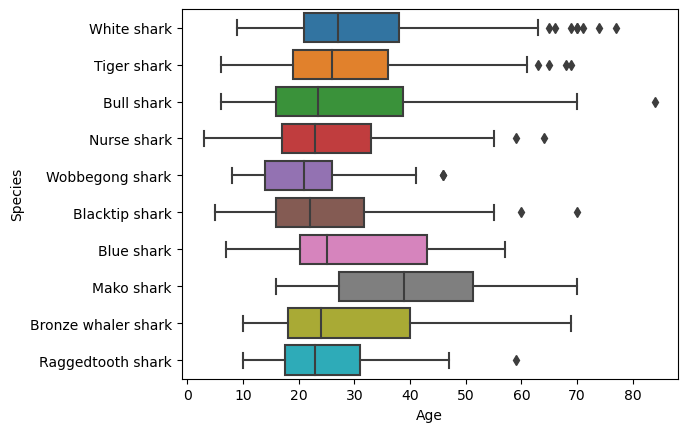

In [9]:
sns.boxplot(x="Age", y="Species", data=df)